In [10]:
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style="ticks")
import pandas as pd
%matplotlib inline
plt.rc('text',usetex=True)
plt.rc('lines',linewidth=1)
plt.rc('legend',fontsize=10)
plt.rc('mathtext',fontset='cm')
plt.rc('font',**{'family':'serif','serif':['Helvetica'],'size':10})

df=pd.read_csv("best.csv")
df

,Unnamed: 0,basis,energy,error,method,multiplicity,systematic_error
0,0,CBS,-15.788495,0.001196,DMC(PBE25),1,0.000519
1,1,CBS,-15.892449,0.001056,DMC(PBE25),3,0.001381
2,2,TZP,-15.785437,0.000000,DFT(PBE25),1,0.000000
3,3,TZP,-15.900415,0.000000,DFT(PBE25),3,0.000000
4,4,TZP,-15.765379,0.000483,VMC(PBE25twobody),1,0.000000
5,5,TZP,-15.770807,0.000496,VMC(PBE25threebody),1,0.000000
6,6,TZP,-15.871181,0.000456,VMC(PBE25twobody),3,0.000000
7,7,TZP,-15.877174,0.000428,VMC(PBE25threebody),3,0.000000


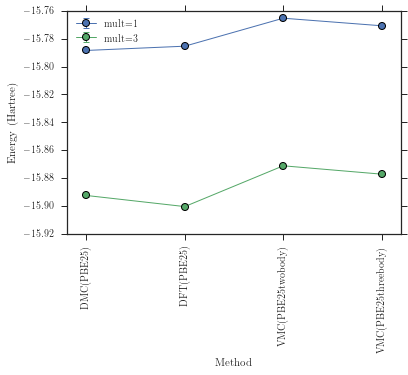

In [14]:
groups=df.groupby('multiplicity')
for nm, group in groups:
  nms=list(group['method'])
  x=range(len(nms))
  plt.errorbar(x,np.array(group['energy']),np.array(group['error']),
              marker='o',mew=1,label='mult='+str(nm))
  plt.xticks(x,nms,rotation='vertical')
plt.xlim(-0.2,3.2)
plt.xlabel("Method")
plt.ylabel("Energy (Hartree)")
plt.legend(loc='best')

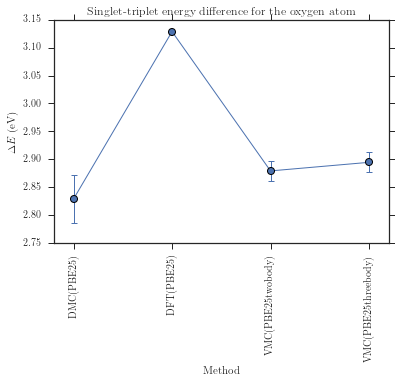

In [23]:
#Make columns for mult3 and mult1 so we can subtract them easily.
mult3=df[df['multiplicity']==3]
mult1=df[df['multiplicity']==1]
#This matches the rows with the same basis and method
combined=mult1.merge(mult3,on=['basis','method'],suffixes=['m1','m3'])
combined['diff']=combined['energym1']-combined['energym3']
combined['differr']=np.sqrt(combined['errorm1']**2+combined['errorm3']**2)

#Now plot the singlet-triplet energy differences
nms=list(combined['method'])
x=range(len(nms))
eV=27.2114
plt.errorbar(x,eV*combined['diff'],eV*combined['differr'],marker='o',mew=1)
plt.xticks(x,nms,rotation='vertical')
plt.xlabel("Method")
plt.xlim(-0.2,len(nms)-0.8)
plt.ylabel("$\Delta E$ (eV)")
plt.title("Singlet-triplet energy difference for the oxygen atom")
plt.savefig("singlet_triplet.pdf",bbox_inches='tight')